# MERS-CoV 데이터 전처리

In [ ]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# date time
from datetime import datetime

In [ ]:
# MERS
mers_cntry = pd.read_csv("/content/drive/My Drive/Colab/COVID19/mers/country_count_latest.csv", encoding='euc_kr')
mers_weekly = pd.read_csv("/content/drive/My Drive/Colab/COVID19/mers/weekly_clean.csv", encoding='euc_kr')

# cleaning
mers_weekly['Year-Week'] = mers_weekly['Year'].astype(str) + ' - ' + mers_weekly['Week'].astype(str)
mers_weekly['Date'] = pd.to_datetime(mers_weekly['Week'].astype(str) + 
                                     mers_weekly['Year'].astype(str).add('-1'),format='%V%G-%u')


# mers_weekly.head()
# mers_cntry.head()

In [ ]:
mers_weekly.head()

,Year,Week,Region,New Cases,Year-Week,Date
0,2012,12,Other Countries,1,2012 - 12,2012-03-19
1,2012,12,Republic of Korea,0,2012 - 12,2012-03-19
2,2012,12,Saudi Arabia,0,2012 - 12,2012-03-19
3,2012,13,Other Countries,0,2012 - 13,2012-03-26
4,2012,13,Republic of Korea,0,2012 - 13,2012-03-26


In [ ]:
Korea_data = mers_weekly[mers_weekly['Region'] == 'Republic of Korea']
Korea_2015_data = Korea_data[Korea_data['Year'] == 2015]
Korea_all_cases = Korea_2015_data.iloc[18:26]

In [ ]:
Korea_all_cases

,Year,Week,Region,New Cases,Year-Week,Date
484,2015,19,Republic of Korea,1,2015 - 19,2015-05-04
487,2015,20,Republic of Korea,17,2015 - 20,2015-05-11
490,2015,21,Republic of Korea,23,2015 - 21,2015-05-18
493,2015,22,Republic of Korea,86,2015 - 22,2015-05-25
496,2015,23,Republic of Korea,37,2015 - 23,2015-06-01
499,2015,24,Republic of Korea,12,2015 - 24,2015-06-08
502,2015,25,Republic of Korea,6,2015 - 25,2015-06-15
505,2015,26,Republic of Korea,3,2015 - 26,2015-06-22


In [ ]:
Date = np.array(Korea_all_cases['Date'])
Y = np.array(Korea_all_cases['New Cases'])

X=[]
for i in range(len(Date)):
  ts = pd.to_datetime(str(Date[i]))
  d = ts.strftime('%Y-%m-%d')
  X.append(d)
# dates_list = []

# for date in X:
#     dates_list.append(datetime.strptime(date, '%Y-%m-%d'))

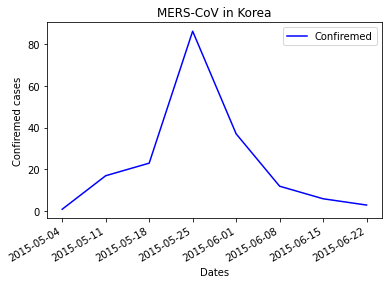

In [ ]:
plt.plot(X, Y, c = 'blue', label='Confiremed')
plt.title("MERS-CoV in Korea")
plt.xlabel("Dates")
plt.ylabel("Confiremed cases")
plt.legend()
plt.gcf().autofmt_xdate()
# plt.grid()

In [ ]:
# https://dj.kbs.co.kr/resources/2015-06-09/ 메르스 확진자 현황 KBS 디지털뉴스국 데이터 저널리즘팀

Dates = []
year='2015'
month = '05'
date = '19'
while True:
  if month == '07' and date == '04':break
  else:
    if int(month) == 1 or int(month) == 3 or int(month) == 5 or int(month) == 7 or int(month) == 8 or int(month) == 10 or int(month) == 12:
      days = 31
    elif int(month) == 2:
      if (int(year) % 4 == 0) and (int(year) % 100 !=0) or (int(year) % 400 == 0):
        days = 29
      else:
        days = 28
    else:
      days = 30  

    if int(date) < days:
      if len(str(int(date)+1)) == 1:
        date = '0'+str(int(date)+1)
      else:
        date = str(int(date)+1)
    elif int(date) == days:
      if len(str(int(month)+1)) == 1:
        month = '0'+str(int(month)+1)
      else:
        month = str(int(month)+1)
      date='00'
      continue
    Dates.append(year+ "-" + month + '-' + date)
X_Dates=[]
for i in range(len(Dates)):
  ts = pd.to_datetime(Dates[i])
  d = ts.strftime('%Y-%m-%d')
  X_Dates.append(d)

X_Dates_list = []

for date in X_Dates:
    X_Dates_list.append(datetime.strptime(date, '%Y-%m-%d'))

In [ ]:
Confirmed = [2,1,0,0,0,
             0,2,0,2,6,
             2,3,7,5,0,
             6,6,22,23,8,
             13,14,4,12,7,
             5,4,8,2,2,
             0,3,3,3,4,
             1,1,1,0,0,
             0,0,1,1,1,1]
len(Confirmed),len(Dates)

(46, 46)

In [ ]:
# df = pd.DataFrame(dict(date = Dates,
#                              confirmed = Confirmed))
# df

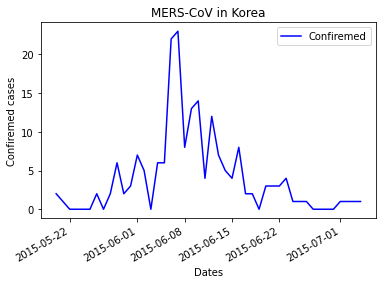

In [ ]:
plt.plot(X_Dates_list, Confirmed, c = 'blue', label='Confiremed')
plt.title("MERS-CoV in Korea")
plt.xlabel("Dates")
plt.ylabel("Confiremed cases")
plt.legend()
plt.gcf().autofmt_xdate()